<a href="https://colab.research.google.com/github/jainakki16/R-D/blob/main/R%26D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TODO
1. Tableau
2. EDA
3. Report
4. Plot of each func
5. 1-D plot


#Analysis of the Chat transcript 

Data will be collected from the chat transcripts of different courses to extract the different information 
regarding interaction of the students, types of question, innovative ideas etc.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


In [ ]:
!pip install python-docx --quiet

     |████████████████████████████████| 5.5MB 15.6MB/s 


In [ ]:
import docx
import pandas as pd
import operator

from matplotlib import pyplot as plt
import seaborn as sns

import nltk

sns.set_style('darkgrid')
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
path_1 = '/content/gdrive/MyDrive/R&D Project/6 January 2021 NLP Introduction.docx'
path_2 = '/content/gdrive/MyDrive/R&D Project/11 January 2021 Words and WordNet.docx'

In [ ]:
def read_data(path):
  time = []
  name = []
  chat = []

  document = docx.Document(path)

  for para in document.paragraphs:
    line = para.text.split()
    if len(line) > 1:
      time.append(line[0])
      name.append(line[1] + ' ' + line[2][:-1])
      chat.append(' '.join(line[3:]))

  data = pd.DataFrame({'Time': time, 'Name': name, 'Chat': chat})

  return data

In [ ]:
data_1 = read_data(path_1)
data_2 = read_data(path_2)
data = [data_1, data_2]

In [ ]:
def get_professor_question(data):
  return data[data['Name'] == 'Ratna Sanyal']

# Number of questions asked by faculty


In [ ]:
j = 1
for i in data:
  print(f'Number of questions asked by faculty in session-{j} : {get_professor_question(i).shape[0]}')
  j += 1

Number of questions asked by faculty in session-1 : 0
Number of questions asked by faculty in session-2 : 4


# Questions asked by faculty with their timestamp

In [ ]:
j = 0
for i in data:
  j += 1
  if get_professor_question(i)[['Time', 'Chat']].shape[0] == 0:
    continue
  else:
    print(f"Time stamp of questions asked by faculty in session-{j} : \n{get_professor_question(i)[['Time', 'Chat']]}\n")


Time stamp of questions asked by faculty in session-2 : 
         Time                                 Chat
0    00:12:59        Give the example for Homonyms
39   00:30:10         Can you example for antonyms
78   00:38:44  Write example for Hyponymy/Hypernym
110  00:45:48            Write example for Meronym



# Most frequent words in question

In [ ]:
def get_top_five(dic):
  sorted_dict = dict(sorted(dic.items(), key=operator.itemgetter(1), reverse=True))
  top_five = {k: sorted_dict[k] for k in list(sorted_dict)[:5]}
  return top_five

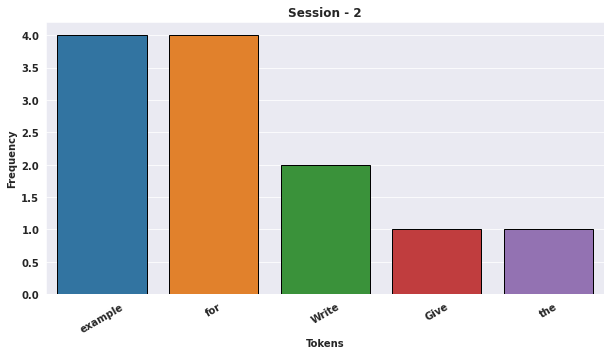

In [ ]:
j = 0
for i in data:
  j += 1

  session = ' '.join(get_professor_question(i)['Chat'].tolist())
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  session = tokenizer.tokenize(session)

  if session == []:
    continue

  word_count = {}
  for word in session:
    if word in word_count:
      word_count[word] += 1
    else:
      word_count[word] = 1
  
  plt.figure(figsize=(10, 5))

  word_count = get_top_five(word_count)
  word_count_keys = list(word_count.keys())
  sns.barplot(x = word_count_keys, y = [word_count[k] for k in word_count_keys], edgecolor = 'black')

  plt.xticks(rotation=30, weight = 'bold')
  plt.yticks(weight = 'bold')
  plt.title(f'Session - {j}', weight = 'bold')
  plt.ylabel('Frequency', weight = 'bold')
  plt.xlabel('Tokens', weight = 'bold')

# Total number of responses in each lecture

In [ ]:
def get_ans_count(data):
  return data[data['Name'] != 'Ratna Sanyal']['Name'].value_counts()

j = 0
total_student_response = {}
for i in data:
  j += 1
  print(f'Total number of responses by students in session-{j} : {get_ans_count(i).sum()}')
  total_student_response[f'Session-{j}'] = get_ans_count(i).sum()

Total number of responses by students in session-1 : 26
Total number of responses by students in session-2 : 140


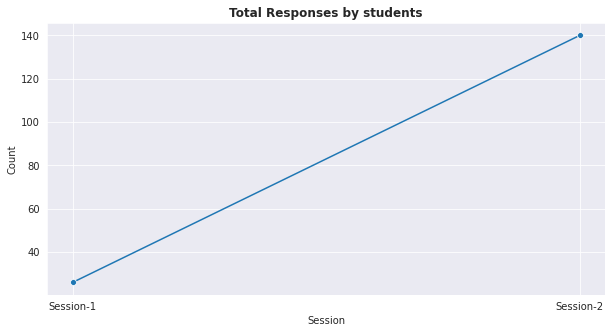

In [ ]:
plt.figure(figsize=(10, 5))

total_student_response_keys = list(total_student_response.keys())
sns.lineplot(x = total_student_response_keys, 
             y = [total_student_response[k] for k in total_student_response_keys], 
             marker = "o")

plt.title('Total Responses by students', weight = 'bold')
plt.ylabel('Count')
plt.xlabel('Session')
plt.show()  

# Number of responses by each student

In [ ]:
j = 0
for i in data:
  print(get_ans_count(i))

Abhinav Gupta        5
Shefali .            5
Kanchan Ninad        4
Arjun Seth           2
Aaditya Gupta        2
Akshay Sharma        2
Riona Chakrabarti    1
Sristi Agrawal       1
Astha Kumar          1
Nidhi Khemka         1
Shikhar Dixit        1
Ali Khan             1
Name: Name, dtype: int64
Darsh Manish            11
Abhinav Gupta           11
Shresth Rana            11
Swattik Chakrabarty      8
Mayank Gubba             8
Ali Khan                 7
Akshay Sharma            7
Tammana Karthik          6
Mayuri Mahesh            6
Shefali .                6
Samarth Gangwal          6
Mousumi Saha             5
Shikhar Dixit            5
Arjun Seth               4
Aaditya Gupta            4
Trisha Sharma            4
Muskan Goel              3
Thadishetty Somanath     3
Navelli Gupta            3
Astha Kumar              3
Sristi Agrawal           3
Shrey Bhardwaj           2
K Vivek                  2
Riona Chakrabarti        2
Anoop Gupta              2
Garray Aneesh           

In [ ]:
def response(data):
  data_copy = data.copy(deep = True)
  data_copy.loc[len(data_copy.index)] = [' ', 'Ratna Sanyal', ' ']
  ques_index = data_copy.index[data_copy['Name'] == 'Ratna Sanyal'].tolist()

  len(ques_index) - 1

  for i in range(len(ques_index) - 1):
    print(get_ans_count(data_copy[ques_index[i] + 1 : ques_index[i + 1]]))
    print()
    print()
    print()

response(data_2)

In [ ]:
data_2

,Time,Name,Chat
0,00:12:59,Ratna Sanyal,Give the example for Homonyms
1,00:13:55,Ali Khan,Accept and except
2,00:14:14,Riona Chakrabarti,are and our - homophones
3,00:14:16,Shefali .,piece and peace
4,00:14:39,Tammana Karthik,break and brake
...,...,...,...
139,00:48:09,Darsh Manish,Darsh is incorrect
140,00:48:39,Shresth Rana,"Darsh confused homonym with meronym, don't wor..."
141,00:48:53,Darsh Manish,I did thank you
142,00:51:39,Shresth Rana,"You're welcome bro, if you need help I'm willi..."
